<a href="https://colab.research.google.com/github/wphall/CO2-Equilibrium/blob/main/Python_Introductory_Activity_KEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following exercise will introduce you to the basic operations of using Python for data plotting and analysis. You will learn how to import a data set to a pandas dataframe, assign names to the data columns, plot the data, and locate maxima in the data.

We will need to use some fundamental libraries for scientific computing:
* [NumPy](https://numpy.org/doc/stable/user/absolute_beginners.html) for calculations
* [Matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html) for making graphs
* [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#) for storing large data sets

In [2]:
#use the import command to import numpy, pandas and matplotlib.pyplot. Give each one an abbreviated name, such as np, pd, and plt, respectively.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import your data into Colab using the [files.upload](https://colab.research.google.com/notebooks/io.ipynb) command. When you run the command you will be able to interact with Colab to upload a file of choice from your local drive to Google Drive.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Spectral Data.xlsx to Spectral Data.xlsx


Put the data from your uploaded file into a pandas dataframe called dfSpectrum using the [pd.read](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) command. You can check the contents of the dataframe by simply typing "dfSpectrum" and executing the cell.

In [4]:
dfSpectrum=pd.read_excel("Spectral Data.xlsx")
dfSpectrum

,1595.108,0.000
0,1595.349,0.000000
1,1595.590,0.000000
2,1595.832,0.000000
3,1596.073,0.000000
4,1596.314,0.000000
...,...,...
865,1803.868,0.022637
866,1804.109,0.024405
867,1804.350,0.022343
868,1804.591,0.021763


Notice that the dataframe uses the first row of data as your column headers. Instead we will assign names to the columns to make it easier to call on them later in the script. Use the [columns attribute](https://www.geeksforgeeks.org/add-column-names-to-dataframe-in-pandas/) to rename the columns "wavelength" and "intensity". (Note that the names you assign here are case-sensitive.) Read out the contents of the dataframe to make sure that the headers have been assigned correctly.

In [5]:
dfSpectrum.columns=['wavelength','intensity']
dfSpectrum

,wavelength,intensity
0,1595.349,0.000000
1,1595.590,0.000000
2,1595.832,0.000000
3,1596.073,0.000000
4,1596.314,0.000000
...,...,...
865,1803.868,0.022637
866,1804.109,0.024405
867,1804.350,0.022343
868,1804.591,0.021763


Next we will create a preliminary plot of our data. Use [matplotlib](https://matplotlib.org/stable/tutorials/pyplot.html) to plot intensity as a function of wavelength. Label the x- and y-axes.

Text(0, 0.5, 'Intensity')

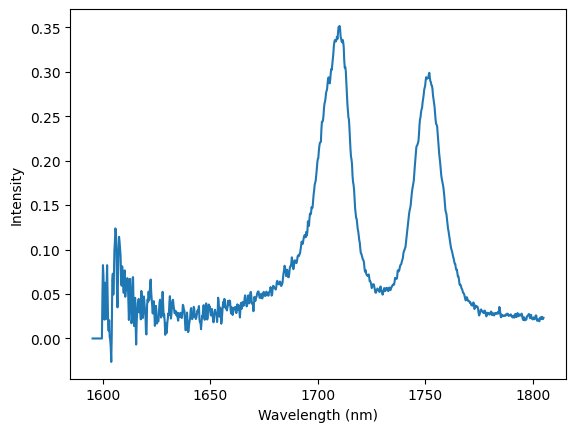

In [6]:
plt.plot(dfSpectrum['wavelength'],dfSpectrum['intensity'])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')

You will see that there are two spectral peaks in our data. The first is centered between approximately 1700 and 1725 nm, and the second is centered between 1725 and 1770 nm. We will create Boolean operators to distinguish these data ranges.

In [11]:
#these Boolean commands give 1D arrays of true/false values that are true where both conditions are met and false everywhere else
BLrange1=(dfSpectrum['wavelength']>1700) & (dfSpectrum['wavelength']<1725)
BLrange2=(dfSpectrum['wavelength']>1725) & (dfSpectrum['wavelength']<1770)

We can use the Booleans created above as a mask on our dataframe. Our goal is to find the maximum value in the intensity column within each Boolean range, then find the wavelength at that maximum intensity. To do this we will start by finding the **index** of the maximum intensity using the [pandas command .idxmax()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html).

In [12]:
peak1_index = dfSpectrum['intensity'][BLrange1].idxmax()
peak2_index = dfSpectrum['intensity'][BLrange2].idxmax()
print("Peak 1 index =", peak1_index)
print("Peak 2 index =", peak2_index)

Peak 1 index = 476
Peak 2 index = 649


The indices that are returned correspond to an entire row of data in the dataframe. You can use the [.iloc function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) to read out the row of data for each index.

In [13]:
dfSpectrum.iloc[peak1_index]

wavelength    1710.09500
intensity        0.35155
Name: 476, dtype: float64

In [14]:
dfSpectrum.iloc[peak2_index]

wavelength    1751.799000
intensity        0.298868
Name: 649, dtype: float64

Recall that our goal was to find the wavelength at each intensity maximum. The wavelength appears as the first value in the array, which has an index of 0. It is convenient to store this wavelength as a named variable.

In [16]:
peak1 = dfSpectrum.iloc[peak1_index,0]
peak2 = dfSpectrum.iloc[peak2_index,0]

print("Peak 1 = ", peak1)
print("Peak 2 = ", peak2)

Peak 1 =  1710.095
Peak 2 =  1751.799


Given the resolution of the spectral data set, we should report our lambda max values to a tenth of a nanometer. We need to round them to one decimal place using the [round() function](https://www.w3schools.com/python/ref_func_round.asp).

In [18]:
roundpeak1 = round(peak1,1)
roundpeak2 = round(peak2,1)

Let's plot the data again, but this time [apply the lambda max labels](https://www.geeksforgeeks.org/add-text-inside-the-plot-in-matplotlib/) to each peak. You can also try changing the [line color](https://matplotlib.org/stable/gallery/color/named_colors.html) and width, adjusting the axis bounds, and resizing the plot. Save your plot as a .png file to your local drive and turn it in to demonstrate that you have completed the exercise.

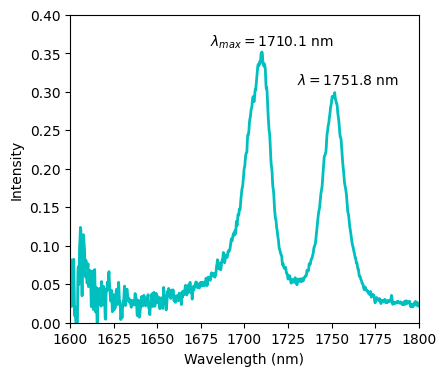

In [46]:
fig = plt.figure(figsize=(4.5,4))
plt.plot(dfSpectrum['wavelength'],dfSpectrum['intensity'], color='c', linewidth=2.0)
plt.axis([1600, 1800, 0, 0.4])
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.text(1680, .36, r'$\lambda_{max}=$' f'{roundpeak1} nm')
plt.text(1730, .31, r'$\lambda=$' f'{roundpeak2} nm')
fig.savefig('Spectral Data Plot.png')